-4.307732200760733e-06
-1671.915760026547


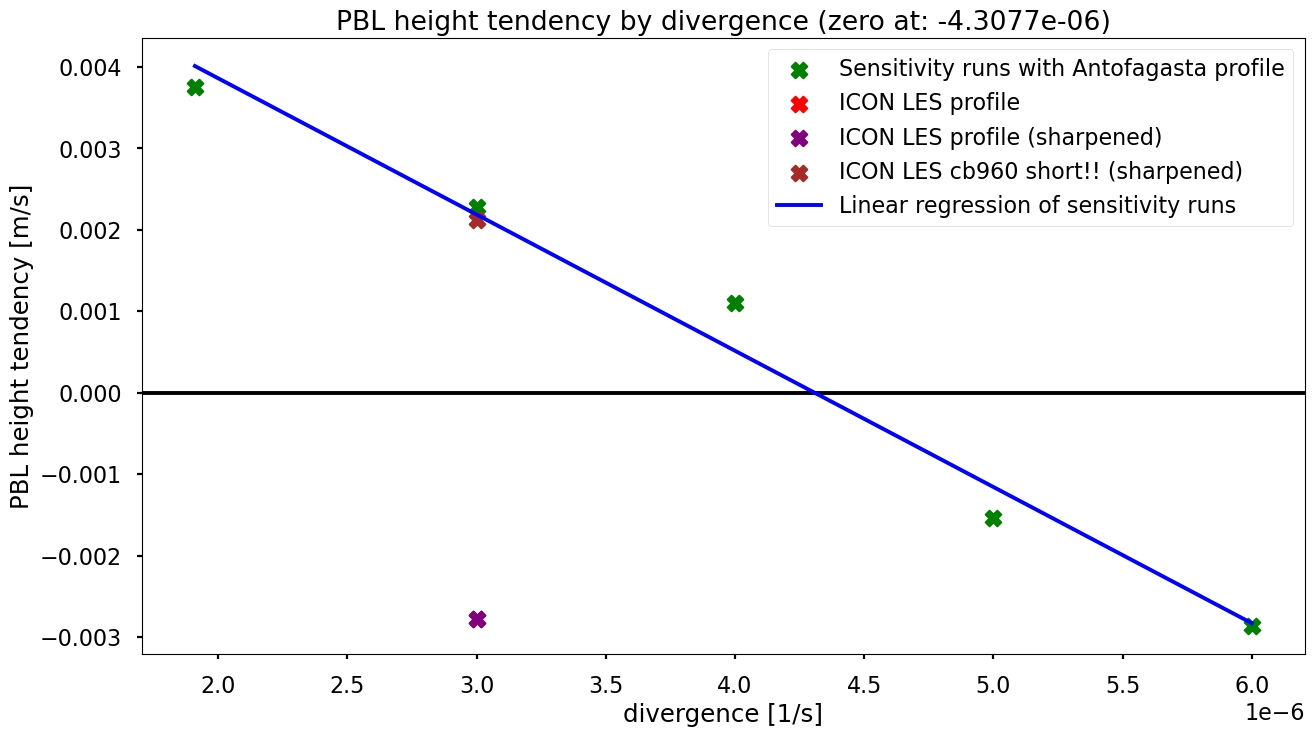

In [1]:
# new scatter plot of divergence run:
# Only evaluating the tendency in the last two hours of a 6 hour run!
# For this can be argued considering the plot of pbl tendency from Antofagasta 1st Control run...
# Linear regression makes sense because of the equation that Monica showed to me.
# Using a divergence value with zero change in BL makes sense because of cloudtop measurements from Cloudnet.

import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=14) 
plt.style.use('seaborn-poster')

outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/05_eval_divs/"

divs = [1.91e-6, 3e-6, 4e-6, 5e-6, 6e-6]
tendency = [0.0037523, 0.002273136, 0.0010988, -0.001537052, -0.0028642]

###############################################################################

def calculate_covariance(array_1, array_2):
    if len(array_1)!=len(array_2):
        print("Arrays haven’t got same dimensions: covariance calculation failed!")
        return 1
    mean_1 = np.nanmean(array_1)
    mean_2 = np.nanmean(array_2)
    summe = 0
    numel = 0
    for i in range(len(array_1)):
        if not(np.isnan(array_1[i]) or np.isnan(array_2[i])):
            summe = summe+(array_1[i]-mean_1)*(array_2[i]-mean_2)
            numel = numel+1
    covariance = summe/(numel-1)
    if np.isnan(covariance):
        covariance=0
    return covariance

###############################################################################

def calculate_regression_linear(array_1, array_2):
    #See that array_1 is the x-value for this regression...
    a = calculate_covariance(array_1, array_2)/calculate_covariance(\
    array_1, array_1)
    b = np.nanmean(array_2)-a*np.nanmean(array_1)
    print(b/a)
    print(a)
    regression_plot = np.zeros(len(array_1))
    for i in range(len(regression_plot)):
        regression_plot[i] = a * array_1[i] + b
    return regression_plot

###############################################################################

plt.figure(figsize=(15,8))
plt.title("PBL height tendency by divergence (zero at: "+str(-4.3077e-06)+")")
plt.axhline(0, color="black")
plt.scatter(divs, tendency, marker="X", color="green", linewidth=1.5,\
            label="Sensitivity runs with Antofagasta profile")
####################
plt.scatter([3e-6], [-0.00277778], marker="X", color="red", linewidth=1.5,\
            label="ICON LES profile")
plt.scatter([3e-6], [-0.0027723693], marker="X", color="purple", linewidth=1.5,\
             label="ICON LES profile (sharpened)")
plt.scatter([3e-6], [0.00212], marker="X", color="brown", linewidth=1.5,\
             label="ICON LES cb960 short!! (sharpened)")
plt.plot(divs, calculate_regression_linear(divs, tendency), color="blue",\
         label="Linear regression of sensitivity runs")
##################
plt.xlabel("divergence [1/s]") # literature value 3.75e-6 can be found in Pedersen 2016 (or Stevens 2005?)
plt.ylabel("PBL height tendency [m/s]")
plt.legend()

# Fuege ICONLES Lauefe mit div = 3e-6 und normalem und scharfem Profil hinzu:

/tmp/ipykernel_76540/2766248897.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


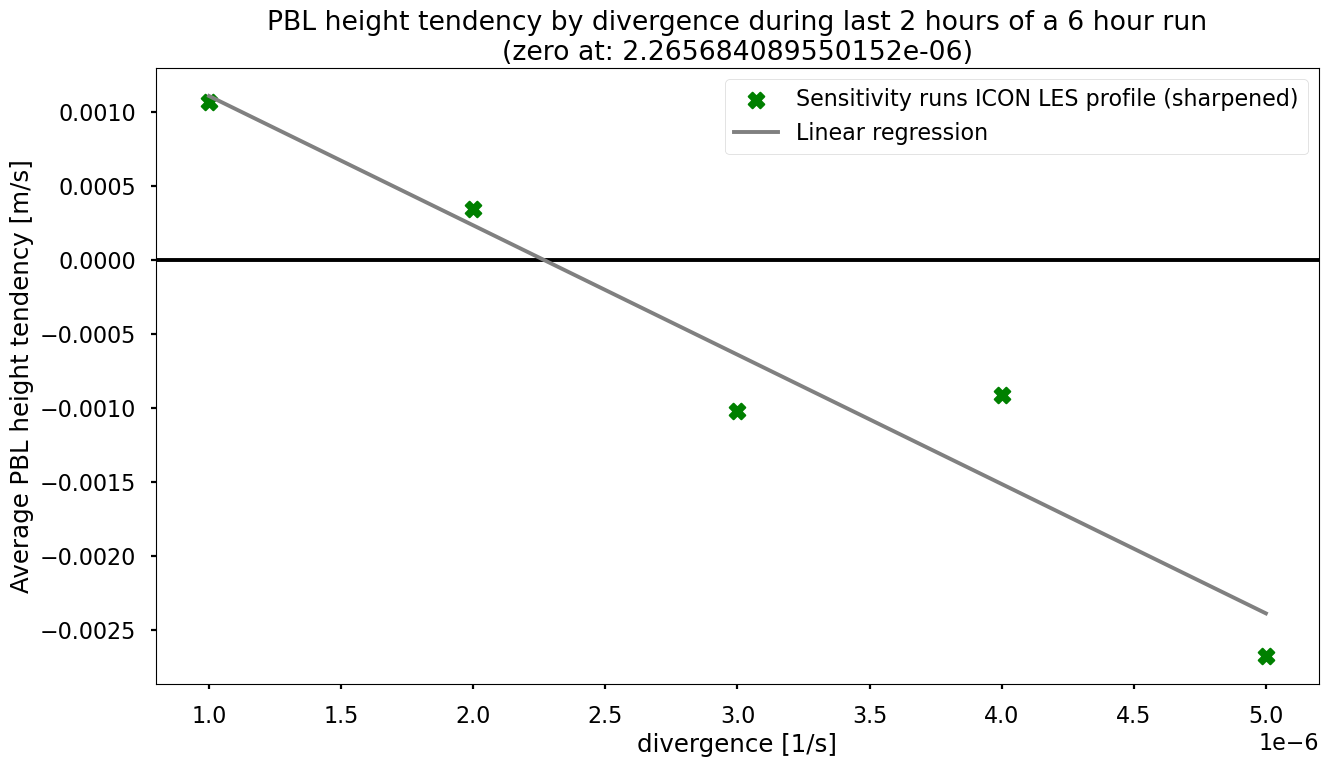

In [2]:

import pandas as pd
import subprocess
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from geopy.distance import geodesic

div1 = "/home/qwertz/UCLA/uclales/Runs/ICON_DIV_1e6/"
div2 = "/home/qwertz/UCLA/uclales/Runs/ICON_DIV_2e6/"
div3 = "/home/qwertz/UCLA/uclales/Runs/ICON_DIV_3e6/"
div4 = "/home/qwertz/UCLA/uclales/Runs/ICON_DIV_4e6/"
div5 = "/home/qwertz/UCLA/uclales/Runs/ICON_DIV_5e6/"

path_list = [div1, div2, div3, div4, div5]

##################################

def calculate_dts(t_arraz):
    dts = np.zeros([len(t_arraz)-1])
    for i, timestep in enumerate(t_arraz):
        if i==len(t_arraz)-1:
            break
        timedelta = t_arraz[i+1]-timestep
        seconds = int(timedelta / np.timedelta64(1, 's'))
        dts[i] = seconds
    return dts

###############################
# Calculate pbl tendencies:

pbl_tendencies = []
for i in range(5):
    ts_path = path_list[i]
    ts_ds = xr.open_dataset(ts_path+"rf01.ts.nc")
    dzdt = np.diff(ts_ds["zi1_bar"].sel(time=slice("2000-01-01T04:00:00", "2000-01-01T05:00:00")).values)/\
        calculate_dts(ts_ds["time"].sel(time=slice("2000-01-01T04:00:00", "2000-01-01T05:00:00")).values)
    pbl_tendency = np.nanmean(dzdt)
    pbl_tendencies.append(pbl_tendency)

################################
# Evaluate divergence:

divs = [1e-6, 2e-6, 3e-6, 4e-6, 5e-6]

###############################################################################

def calculate_covariance(array_1, array_2):
    if len(array_1)!=len(array_2):
        print("Arrays haven’t got same dimensions: covariance calculation failed!")
        return 1
    mean_1 = np.nanmean(array_1)
    mean_2 = np.nanmean(array_2)
    summe = 0
    numel = 0
    for i in range(len(array_1)):
        if not(np.isnan(array_1[i]) or np.isnan(array_2[i])):
            summe = summe+(array_1[i]-mean_1)*(array_2[i]-mean_2)
            numel = numel+1
    covariance = summe/(numel-1)
    if np.isnan(covariance):
        covariance=0
    return covariance

###############################################################################

def calculate_regression_linear(array_1, array_2):
    #See that array_1 is the x-value for this regression...
    a = calculate_covariance(array_1, array_2)/calculate_covariance(\
    array_1, array_1)
    b = np.nanmean(array_2)-a*np.nanmean(array_1)
    regression_plot = np.zeros(len(array_1))
    for i in range(len(regression_plot)):
        regression_plot[i] = a * array_1[i] + b
    return regression_plot, -b/a

###############################################################################

def newlst_tocsv(newdiv,lst,divname):
    lst_div2=lst
    lst_div2[1]=-lst_div2[0]*newdiv
    lst_div2.to_csv(divname,sep='\t',header=None,index=None, float_format="%.3E")

#############################################

regression, div0 = calculate_regression_linear(divs, pbl_tendencies) 

##############################################
plt.figure(figsize=(15,8))
plt.title("PBL height tendency by divergence during last 2 hours of a 6 hour run\n(zero at: "+str(div0)+")")
plt.axhline(0, color="black")
plt.scatter(divs, pbl_tendencies, marker="X", color="green", linewidth=1.5,\
            label="Sensitivity runs ICON LES profile (sharpened)")
plt.plot(divs, regression, color="grey",\
         label="Linear regression")
plt.xlabel("divergence [1/s]") # literature value 3.75e-6 can be found in Pedersen 2016 (or Stevens 2005?)
plt.ylabel("Average PBL height tendency [m/s]")
plt.legend()
plt.savefig(outputdir+"ICON_DIV_evaluation.png", facecolor="white")